# Using AphiaIDs to download OBIS occurrences for Bio/Eco EOVs

Created: 2024-09-13

Modified: 2024-12-13

The Global Ocean Observing System (GOOS) is a global network of ocean observing systems led by the Intergovernmental Oceanographic Commission of UNESCO. NOAA's U.S. Integrated Ocean Observing System (IOOS) is a part of this global network. GOOS has developed Essential Ocean Variables (EOVs) to help harmonize data that is collected across various ocean observing systems around the globe. The [GOOS Biology and Ecosystems Variables](https://goosocean.org/what-we-do/framework/essential-ocean-variables/) are focused on the abundance and distribution of specific groups of aquatic organisms that are important for ecosystems. 

Through the work of the [Biology - Integrating Core to Essential Variables (Bio-ICE) task team](https://zenodo.org/records/7335670), a [process](https://github.com/MathewBiddle/bio_ice/blob/main/create_map_from_OBIS_API.ipynb) was established to programmatically query the [Ocean Biodiversity Information System](https://www.obis.org/) API for shallow water hard corals (taxonomic order [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363)) to generate a map of the density of occurrences.

To build on that process, the [IOOS Marine Life Data Network](https://ioos.github.io/marine_life_data_network/) has developed an example [list of biological taxa](https://github.com/ioos/marine_life_data_network/tree/main/eov_taxonomy) that align with GOOS EOVs. The lists contain their identifiers (in this case, aphiaIDs) that can be used to query published biological occurrence data in the OBIS. The lists established for this notebook are not comprehensive and serve as an example for how one could organize AphiaIDs to programmatically query OBIS for appropriate data.

OBIS uses the [World Register of Marine Species](https://marinespecies.org) (WoRMS) to provide a taxonomic backbone for all of the records in the database. WoRMS provides an authoritative and comprehensive list of names of **marine** organisms, including information on synonymy. Therefore, the lists developed by the IOOS Marine Life Data Network leverage the taxonomic scope of WoRMS to perform high-level queries without requiring a detailed list of every species of seabird, for example. Once a query is complete, users can begin analyzing OBIS occurrence data to assess the abundance, distribution, and other characteristics of the taxa in these BioEco Variables.

This notebook provides an example in R for how to use the Marine Life Data Network's list of AphiaIDs for the GOOS BioEco Variables to perform an OBIS query. This particular notebook uses mangroves as an example, but the query could be edited for any of the BioEco EOVs.

In [1]:
library(readr)
library(robis)
library(maps)
library(dplyr, warn.conflicts = FALSE)
library(htmlwidgets)

First, we will pull the file with the mangrove aphiaIDs from the Marine Life Data Network GitHub repo.

**Note**: the `acceptedTaxonIds` in these files are based on what was up-to-date in the WoRMS database as of the date this script was written.

In [2]:
mangroves <- read.csv("https://raw.githubusercontent.com/ioos/marine_life_data_network/main/eov_taxonomy/mangroves.csv")

Now we will do a bit of cleanup to get a list of aphiaIDs for mangroves so we can run our [`robis`](https://iobis.github.io/robis/articles/getting-started.html) query using these as taxon identifiers.

In [3]:
mangroves$ID <- gsub("urn:lsid:marinespecies.org:taxname.", "", mangroves$acceptedTaxonId)
mangroves$ID <- as.numeric(mangroves$ID)
mangroveIdentifiers <- paste(mangroves$ID, collapse = ", ")

Using the taxonIDs from the last step, let's query OBIS for occurrence data for mangroves. This step may take a bit of time to run. When this script was written, there were over 130,000 records for mangroves in OBIS.


**Note**: You can edit this query to pull down less data if you are not planning to use every field. Here is how that might look.

`mangrove_occ <- robis::occurrence(taxonid = mangroveIdentifiers, fields = c("occurrenceID", "species", "decimalLongitude", "decimalLatitude", "date_year"))`

In [4]:
mangrove_occ <- robis::occurrence(taxonid = mangroveIdentifiers)

Retrieved 5000 records of approximately 132901 (3%)
Retrieved 10000 records of approximately 132901 (7%)
Retrieved 15000 records of approximately 132901 (11%)
Retrieved 20000 records of approximately 132901 (15%)
Retrieved 25000 records of approximately 132901 (18%)
Retrieved 30000 records of approximately 132901 (22%)
Retrieved 35000 records of approximately 132901 (26%)
Retrieved 40000 records of approximately 132901 (30%)
Retrieved 45000 records of approximately 132901 (33%)
Retrieved 50000 records of approximately 132901 (37%)
Retrieved 55000 records of approximately 132901 (41%)
Retrieved 60000 records of approximately 132901 (45%)
Retrieved 65000 records of approximately 132901 (48%)
Retrieved 70000 records of approximately 132901 (52%)
Retrieved 75000 records of approximately 132901 (56%)
Retrieved 80000 records of approximately 132901 (60%)
Retrieved 85000 records of approximately 132901 (63%)
Retrieved 90000 records of approximately 132901 (67%)
Retrieved 95000 records of appr

Now that we have all of our mangrove records from OBIS, we will map the global distribution of records using the `map_ggplot` function found in the `robis` package.

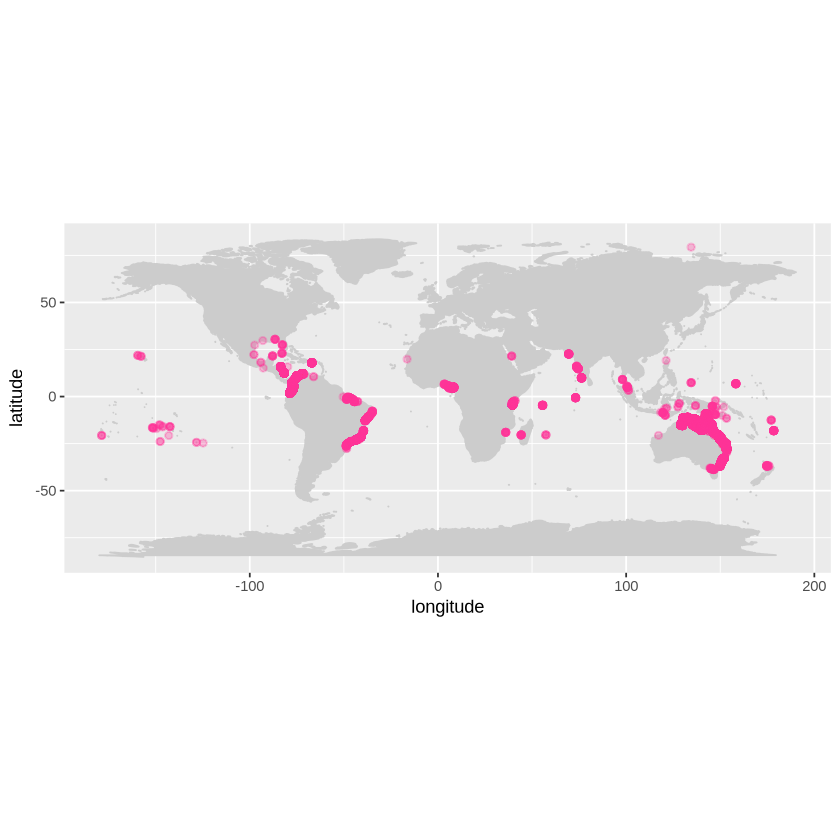

In [5]:
map_ggplot(mangrove_occ)

From here, you could further subset the data by species or year to run more detailed analyses about mangrove biology. You could also use the map of mangrove species to identify geographic gaps where more occurrence data might be needed, or to identify errors in the data. Do you see the dot on the mangrove map in the Arctic? If you find errors in data like this, you can make a GitHub issue to report them, like [this one](https://github.com/gbif/portal-feedback/issues/5480).

Because you used the AphiaIDs to search for all families and genera of known mangrove species, you can be assured that you have all of the mangrove data currently published to OBIS. This could be repeated for any of the other lists of AphiaIDs for BioEco EOVs. This is a beginning step to many possible analyses.

For more information and code about how to get EOV data from OBIS, see the [GOOS BioEco Metadata Portal](https://bioeco.goosocean.org/).

References:

Erica K. Towle, Abigail Benson, Mathew Biddle, Sarah R. D. Bingo, Kaitlyn Brucker, Gabrielle Canonico, Maggie Chory, Kruti Desai, Masha Edmondson, Miguel Figuerola, Christina L. Horstmann, Susan Jackson, Jennifer Koss, Kathryn E. Lohr, J. Landrum, Laura Lorenzoni, Anderson B. Mayfield, Brian D. Melzian, Frank E. Muller-Karger, … Kimberly K. Yates. (2022). Biology: Integrating Core To Essential Variables (Bio-ICE) Task Team Report for Hard Corals. https://zenodo.org/records/7335670